# Bat Tracking Machine Learning

**NAME:** Jake Rood

**LAST UPDATE:** 07-24-2024

## Import Data

In [1]:
import pandas as pd
data = pd.read_csv('final-data.csv')

## Split Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Define feature variables and target variables
features = data[['avg_bat_speed', 'swing_length']]
targets = data[['whiff_per_swing', 'K%', 'SLG', 'HR%', 'Barrel%', 'HardHit%']]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [6]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]

(array([[ 0.20752716, -1.09425191],
        [ 1.16248227, -0.19504382],
        [-0.37497963,  0.67714979],
        [-0.03655853,  0.75300915],
        [-1.37239125,  0.86684484]]),
 array([[ 1.19605631,  1.06205866],
        [ 0.18950187,  0.49493664],
        [ 0.50690275, -0.10125932],
        [ 0.10856211,  1.13013235],
        [-0.47256173, -0.75141768]]))

## Multi Output Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the MultiOutputRegressor with LinearRegression
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Initialize lists to store metrics
metrics = []

# Calculate metrics for each target variable
for i, target_name in enumerate(targets.columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    metrics.append({
        'Target': target_name,
        'Mean Squared Error': mse,
        'R-squared': r2
    })

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df

,Target,Mean Squared Error,R-squared
0,whiff_per_swing,0.003302,0.107541
1,K%,0.003328,0.033883
2,SLG,0.003439,0.095095
3,HR%,0.000148,0.263172
4,Barrel%,0.000755,0.389107
5,HardHit%,0.002899,0.533773


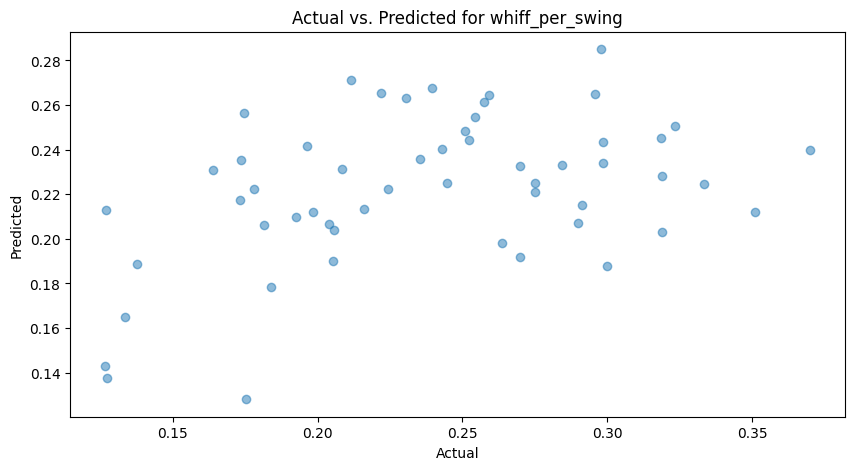

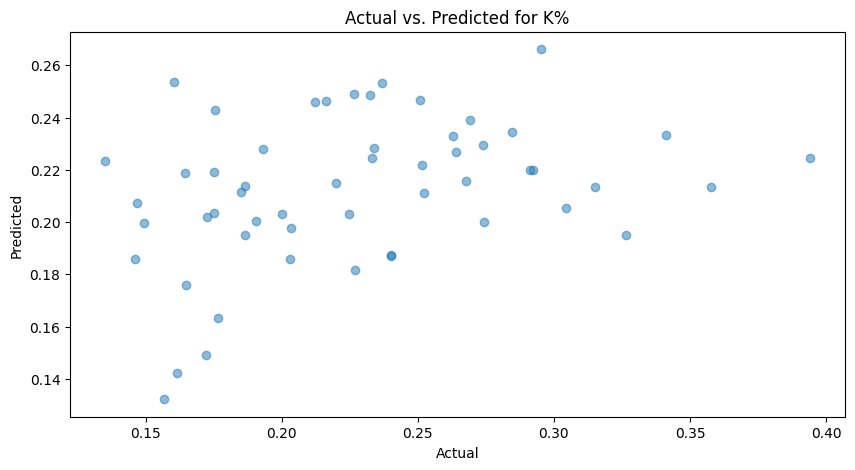

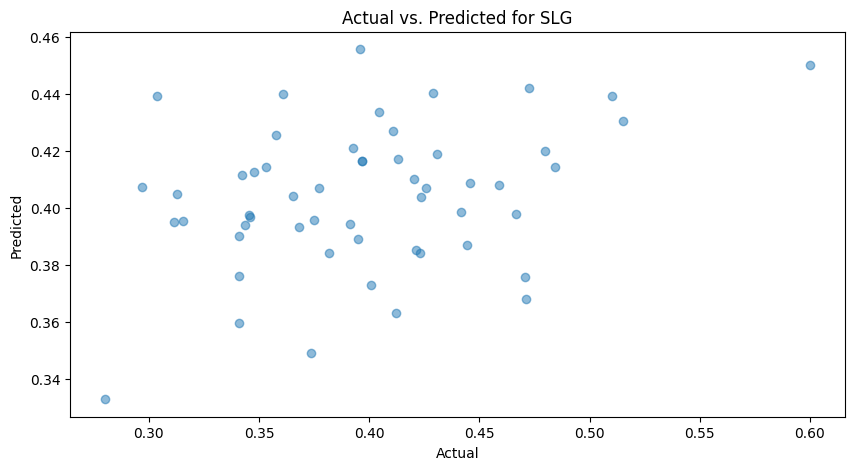

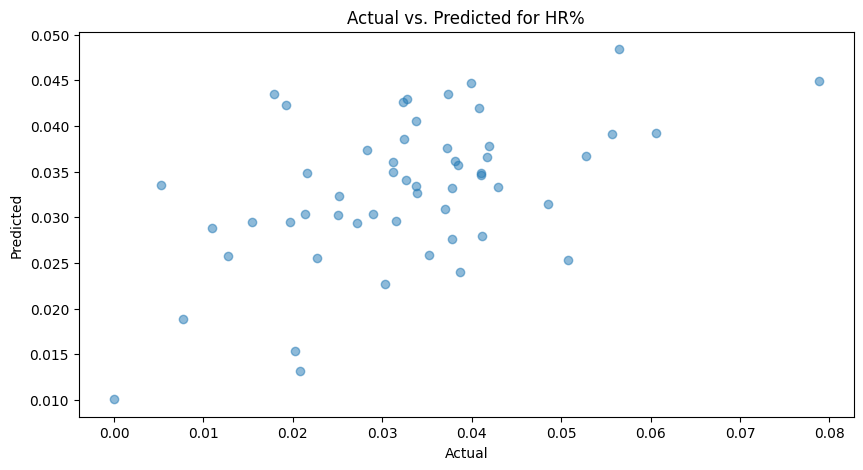

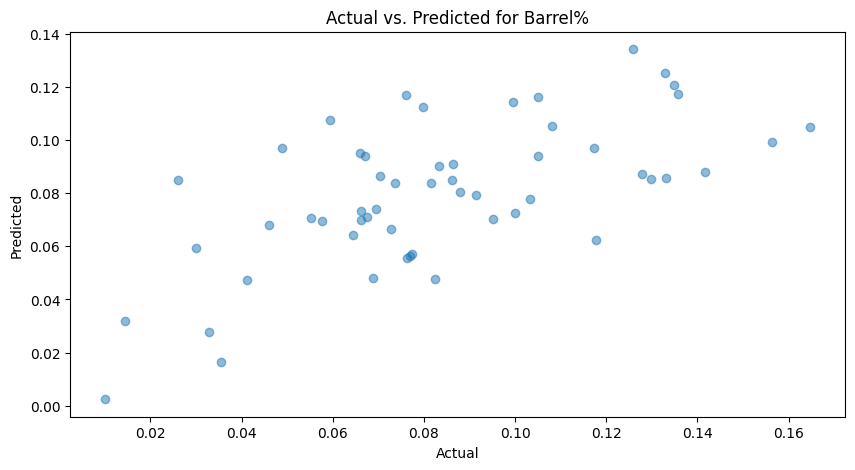

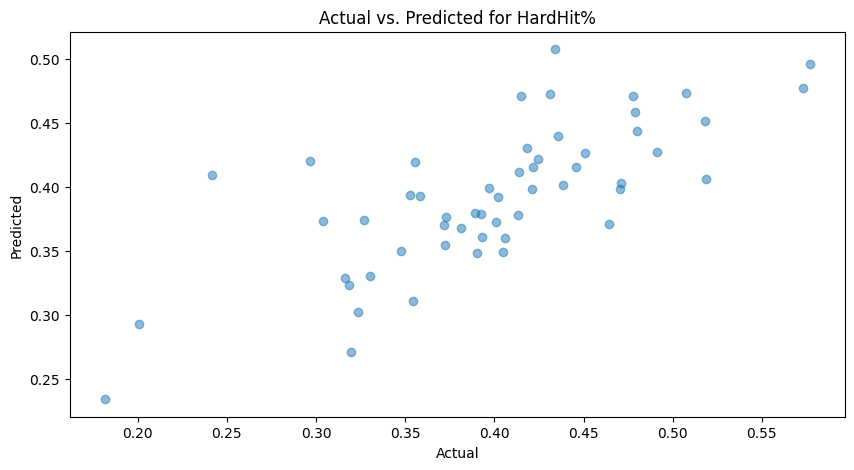

In [8]:
import matplotlib.pyplot as plt

for i, target_name in enumerate(targets.columns):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted for {target_name}')
    plt.show()